<p>def recomendacion_usuario( id de usuario) : Ingresando el id de un usuario, deberíamos recibir una lista con 5 juegos recomendados para dicho usuario.</p>

<p>La otra propuesta para el sistema de recomendación debe aplicar el filtro user-item, esto es tomar un usuario, se encuentran usuarios similares y recomiendan ítems que a esos usuarios similares les gustaron. En este caso el input es un usuario y el output es una lista de juegos que se le recomienda a ese usuario, en general se explican como “A usuarios que son similares a tí también les gustó…”. </p>

In [55]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt


In [56]:
df_ml = pd.read_csv('datasets/df_ml.csv')
df_ml_names = pd.read_csv('datasets/df_ml_names.csv')

In [57]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90865 entries, 0 to 90864
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             90865 non-null  object
 1   genres              90865 non-null  object
 2   item_id             90865 non-null  int64 
 3   item_name           90865 non-null  object
 4   recommend           90865 non-null  bool  
 5   sentiment_analysis  90865 non-null  int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 3.6+ MB


In [58]:
label_encoder = LabelEncoder()

for columna in df_ml.columns:
    if df_ml[columna].dtype == 'object':
        df_ml[columna] = label_encoder.fit_transform(df_ml[columna])

In [59]:
df_ml['recommend'] = df_ml['recommend'].astype(int)

In [60]:
df_ml.head()

,user_id,genres,item_id,item_name,recommend,sentiment_analysis
0,16608,0,20,143,0,1
1,16159,0,20,143,0,1
2,1323,0,20,143,0,1
3,17655,0,20,143,0,1
4,14181,0,20,143,0,1


In [61]:
n_clusters = 2
features = df_ml[['user_id','genres','item_id','item_name','recommend','sentiment_analysis']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
kmeans.fit(scaled_features)

df_ml['cluster'] = kmeans.labels_


In [67]:
df_ml.head()

,user_id,genres,item_id,item_name,recommend,sentiment_analysis,cluster
0,16608,0,20,143,0,1,1
1,16159,0,20,143,0,1,1
2,1323,0,20,143,0,1,1
3,17655,0,20,143,0,1,1
4,14181,0,20,143,0,1,1


In [63]:
kmeans.fit(df_ml)

KMeans(n_clusters=2, n_init=10, random_state=0)

In [64]:
cluster_labels = kmeans.labels_

df_ml['cluster'] = cluster_labels

In [66]:
df_ml.to_csv('datasets/df_ml.csv', sep=',', index=False)

In [68]:
def recomendacion_usuario(user_id):
    
    if user_id not in df_ml['user_id'].values:
        return f"El usuario {user_id} no se encuentra."

    user_cluster = df_ml[df_ml['user_id'] == user_id]['cluster'].values[0]

    users_mismo_cluster = df_ml[df_ml['cluster'] == user_cluster]

    juegos_recomendados = users_mismo_cluster.groupby('item_id')['recommend'].sum()
    
    top_5 = juegos_recomendados.sort_values(ascending=False).head(5)
    

    recomendaciones = []
    for i, game_id in enumerate(top_5.index):
        game_name = df_ml_names.loc[df_ml_names['item_id'] == game_id, 'item_name'].values
        recomendaciones.append(f"Recomendación {i+1}: {game_name[0]}")
    respuesta = {"Recomendaciones para el usuario": user_id, "recomendaciones": recomendaciones}
    return respuesta

In [70]:
recomendacion_usuario(user_id=16159)


{'Recomendaciones para el usuario': 16159,
 'recomendaciones': ['Recomendación 1: Terraria',
  "Recomendación 2: Garry's Mod",
  'Recomendación 3: Counter-Strike: Global Offensive',
  'Recomendación 4: Left 4 Dead 2',
  'Recomendación 5: Arma 3']}

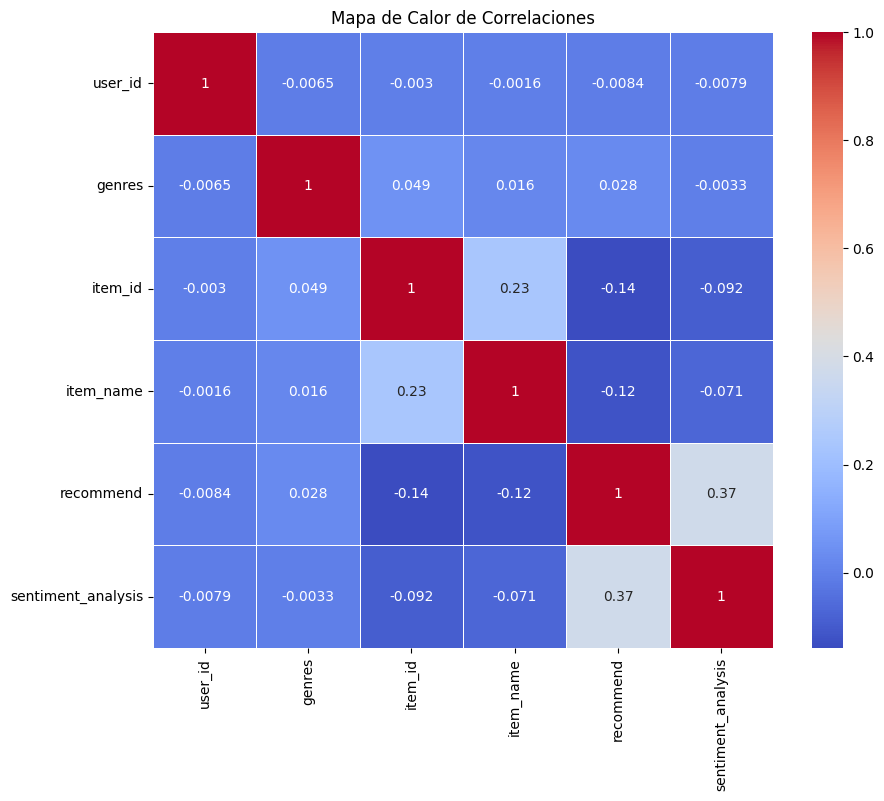

In [20]:
variables = df_ml[['user_id', 'genres', 'item_id', 'item_name', 'recommend', 'sentiment_analysis']]


correlation_matrix = variables.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

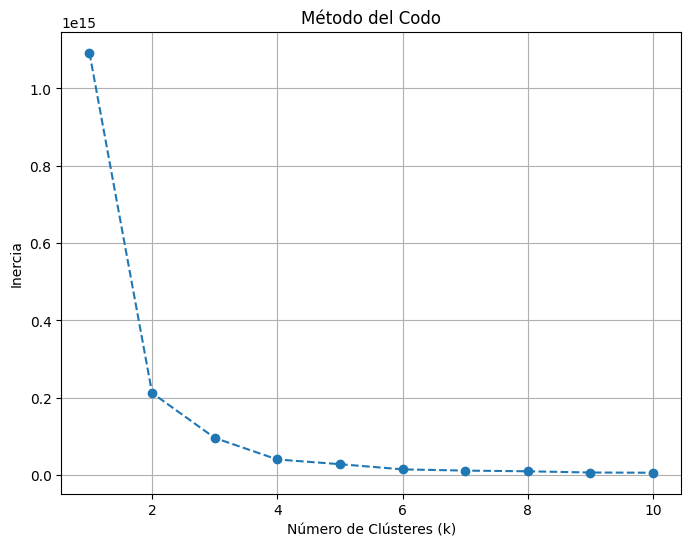

In [21]:
X = df_ml[['user_id','genres','item_id','item_name','recommend','sentiment_analysis']]  


inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.grid()
plt.show()


Este gráfico me indica que para mi dataset, el numero de clústers ideal es 2.